# Objective 01 - describe the foundational components of a neural network

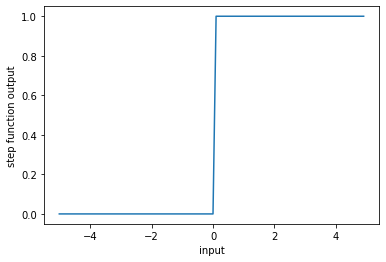

In [8]:
# Activation function
# The activation function maps the input to the output. This example uses a step function where the output is 0 if the sum of the weighted input is less than 0, and 1 otherwise. A visualization of the function will help.

import numpy as np
import matplotlib.pyplot as plt

# define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# vectorize the function (use of an array)
unit_step_v = np.vectorize(unit_step)

# create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# plot
plt.plot(x, y)
plt.xlabel('input')
plt.ylabel('step function output');


In [11]:
# data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1)
]

In [46]:
# Perceptron code follows the example here, with
# some modifications: 
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Imports
#for random input selection
from random import choice 

# Weights (begin with random weights)
w = np.random.rand(3)

# Errors (store for plotting)
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learn_rate = 0.2

# Number of iterations/weight updates
n = 50

# "Learning" loop
for i in range(n):

    # Select a random item from the training data
    x, expected = choice(training_data)

    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)

    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)

    # Update the weights
    w += learn_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.02105017428861644 -> 0
[0 1]: 0.3311756264981188 -> 1
[1 0]: 0.28667196936244443 -> 1
[1 1]: 0.6388977701491797 -> 1


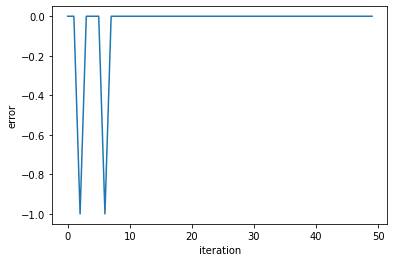

In [47]:
 # plot error as a function of iteration

iteration = np.arange(0, n, 1)
plt.plot(iteration, errors)
plt.xlabel('iteration')
plt.ylabel('error');

In [48]:
training_data

[(array([0, 0, 1]), 0),
 (array([0, 1, 1]), 1),
 (array([1, 0, 1]), 1),
 (array([1, 1, 1]), 1)]

# Objective 02 - introduce the Keras Sequential Model API

Keras Classes
This library provides a simple way to create and train neural networks. We'll be using the sequential model class (tf.keras.models.Sequential()) and will add layers with the layer activation functions (model.add(layers.Dense()). After the model is created, we need to compile it with the model training class (Model.compile()).

Before we create a more complicated keras model, we'll reproduce the perceptron model that we coded up in the previous objective.

The basic process that we'll follow is very similar to how we fit models in Unit 2:

```
Load Data
Define Model
Compile Model
Fit Model
Evaluate Model
```



In [49]:
# import 
import pandas as pd

# create the OR operator
data = {
    'x1': [0,1,0,1],
    'x2': [0,0,1,1],
    'y': [0,1,1,1],
}

df = pd.DataFrame.from_dict(data).astype('int')
display(df.head())

# Separate feature and target
X = df[['x1', 'x2']].values
y = df['y'].values

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [53]:
# Keras Perceptron
# Now we'll use keras to create the perceptron model. We have one layer, which is both the input layer and the output layer.

# import keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Perceptron model
# PS: seems like the sequence is to 
# initialize, add, compile, fit 
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10)



Epoch 1/10
1/1 [==============================] - 0s 220ms/step - loss: 1.0913 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0902 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0891 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0880 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0869 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0858 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0846 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0824 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0813 - accuracy: 0.0000e+00


In [54]:
# evaluate the model
print("Model Accuracy: ", model.evaluate(X, y)[1]*100)

1/1 [==============================] - 0s 76ms/step - loss: 1.0802 - accuracy: 0.0000e+00
Model Accuracy:  0.0


Follow Along
We'll test out keras with the Pima Indians diabetes dataset. Recall that this dataset uses various health metrics to predict if a certain individual will have the specified disease, in this case diabetes. The dataset information is available [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names (Links to an external site.)
) and the link to the csv is in the code cell below.

Data Parameters
We have eight input variables (features) that we're using to predict if the presence of the disease has been tested as positive (0-no, 1-yes). As usual, we'll load the data and separate it into training and testing sets.



In [55]:
# import the Pima Indians diabetes dataset
import numpy as np

# set the URL for the data location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# load the dataset as a numpy array
dataset = np.loadtxt(url, delimiter=',')

# split into input(X) and output(y) variables
# (8 input columns, 1 target column)
X = dataset[:, 0:8]
y = dataset[:, 8]

In [56]:
# define the keras model
model = Sequential()

# add three layers, one input and two hidden
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# fit the keras model on the dataset
# (remove the verbose  = 0 argument to see the output)
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
77/77 [==============================] - 0s 455us/step - loss: 0.5296 - accuracy: 0.7500
Epoch 2/100
77/77 [==============================] - 0s 454us/step - loss: 0.5181 - accuracy: 0.7409
Epoch 3/100
77/77 [==============================] - 0s 451us/step - loss: 0.5186 - accuracy: 0.7591
Epoch 4/100
77/77 [==============================] - 0s 455us/step - loss: 0.5135 - accuracy: 0.7513
Epoch 5/100
77/77 [==============================] - 0s 460us/step - loss: 0.5401 - accuracy: 0.7409
Epoch 6/100
77/77 [==============================] - 0s 442us/step - loss: 0.5448 - accuracy: 0.7240
Epoch 7/100
77/77 [==============================] - 0s 455us/step - loss: 0.5350 - accuracy: 0.7383
Epoch 8/100
77/77 [==============================] - 0s 457us/step - loss: 0.5227 - accuracy: 0.7318
Epoch 9/100
77/77 [==============================] - 0s 458us/step - loss: 0.5169 - accuracy: 0.7448
Epoch 10/100
77/77 [==============================] - 0s 453us/step - loss: 0.5494 - accura

In [60]:
# evaluate the model
print('Model Accuracy: ', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 379us/step - loss: 0.4673 - accuracy: 0.7826
Model Accuracy:  78.25520634651184
